### 1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Elimina del dataframe todas las filas que se correspondan con la clase valor "1".

Ahora, realiza el ejercicio con el nuevo dataframe:

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (modifica, prueba) los argumentos y comenta si modificando algunas de ellas se mejora el porcentaje de acierto del problema (probar al menos 2 diferentes)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv("../data/usuarios_win_mac_lin.csv")

In [3]:
df

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


In [4]:
df = df[df.clase != 1]
df

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


C:\Users\Daniel\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


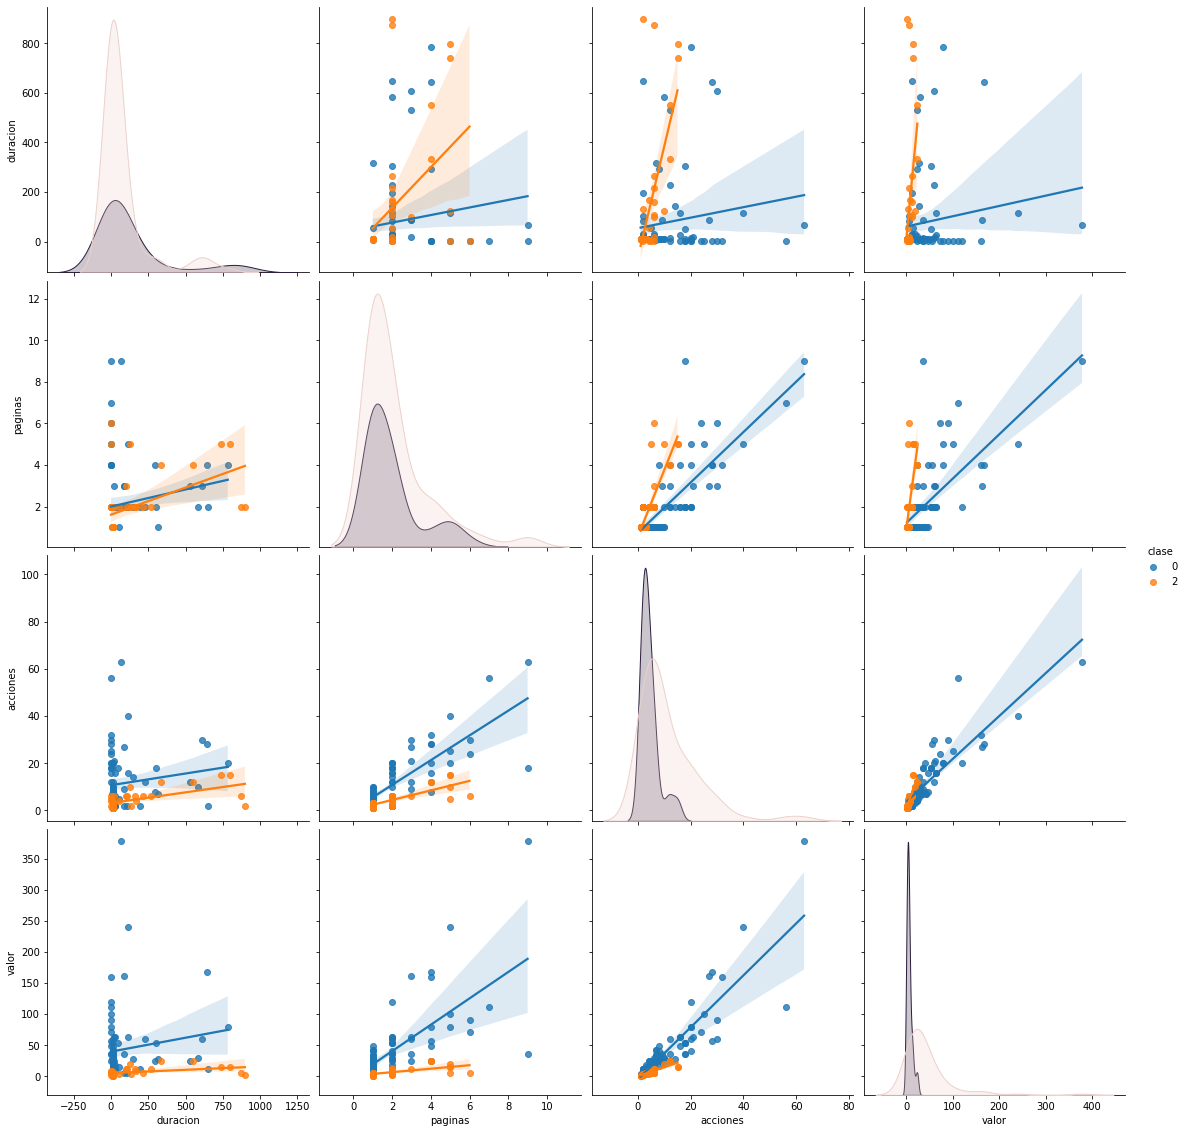

In [5]:
sb.pairplot(df.dropna(), hue='clase',size=4,vars=["duracion", "paginas","acciones","valor"],kind='reg')

In [6]:
df.drop(['clase'], 1)

,duracion,paginas,acciones,valor
0,7.0,2,4,8
1,21.0,2,6,6
2,57.0,2,4,4
3,101.0,3,6,12
4,109.0,2,6,12
...,...,...,...,...
165,13.0,1,7,42
166,12.0,1,2,6
167,13.0,1,3,9
168,13.0,1,7,28


# Ahora, realiza el ejercicio con el nuevo dataframe

In [7]:
X = np.array(df.drop(['clase'], axis=1))
y = np.array(df['clase'])
print(y.shape)
X.shape

(130,)


(130, 4)

In [50]:
seed = 19
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=seed)
model = linear_model.LogisticRegression(max_iter=100)
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=3, random_state=7, shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f %s (%f)" % (name, cv_results.mean(), "+-", cv_results.std())
print("Cross validation results: ", cv_results)
print("----------")
print(msg)
print("----------")
model.fit(X,y)
print(f'Score of model using seed {seed} with two classes: ',"{:.3f}%".format(model.score(X, y)*100))

Cross validation results:  [0.97142857 0.91428571 0.88235294]
----------
Logistic Regression: 0.922689 +- (0.036847)
----------
Score of model using seed 19 with two classes:  95.385%


I think the reason the score is higher is because as there are only 2 options, the algorithm is more likely to find the right answer. Mainly as the choices are YES or NO, rather than YES, NO, MAYBE.

In [46]:
seed = 19
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=seed)
model2 = linear_model.LogisticRegression(max_iter=100, solver="liblinear")
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=3, random_state=seed, shuffle=True)
cv_results = model_selection.cross_val_score(model2, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f %s (%f)" % (name, cv_results.mean(), "+-", cv_results.std())
print("Cross validation results: ", cv_results)
print("----------")
print(msg)
print("----------")
model2.fit(X,y)
print(f'Score of model using seed {seed} with two classes: ',"{:.3f}%".format(model2.score(X, y)*100))


Cross validation results:  [0.97142857 0.97142857 0.85294118]
----------
Logistic Regression: 0.931933 +- (0.055855)
----------
Score of model using seed 19 with two classes:  96.154%


## Este de arriba con solver="liblinear" es el que mejor ha funcionado de los tres.

In [47]:
seed = 19
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=seed)
model3 = linear_model.LogisticRegression(max_iter=100, penalty="elasticnet", solver="saga", l1_ratio=1)
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=3, random_state=seed, shuffle=True)
cv_results = model_selection.cross_val_score(model3, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f %s (%f)" % (name, cv_results.mean(), "+-", cv_results.std())
print("Cross validation results: ", cv_results)
print("----------")
print(msg)
print("----------")
model3.fit(X,y)
print(f'Score of model using seed {seed} with two classes: ',"{:.3f}%".format(model3.score(X, y)*100))


Cross validation results:  [0.62857143 0.65714286 0.76470588]
----------
Logistic Regression: 0.683473 +- (0.058612)
----------
Score of model using seed 19 with two classes:  70.769%
C:\Users\Daniel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Daniel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Daniel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Daniel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear